# 	Loading the dataset

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("D:\Assignments\Basic stats -1\sales_data_with_discounts.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Aniket\AppData\Local\Temp\ipykernel_18700\2553946433.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("D:\Assignments\Basic stats -1\sales_data_with_discounts.csv")


In [7]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


# 	Identify numerical columns in the dataset.

In [9]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [10]:
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

# Calculate the mean, median, mode, and standard deviation for these columns.

In [11]:
stats = df[numerical_columns].describe().transpose()
stats['mode'] = df[numerical_columns].mode().iloc[0]

print(stats)

                   count          mean           std         min          25%  \
Volume             450.0      5.066667      4.231602    1.000000     3.000000   
Avg Price          450.0  10453.433333  18079.904840  290.000000   465.000000   
Total Sales Value  450.0  33812.835556  50535.074173  400.000000  2700.000000   
Discount Rate (%)  450.0     15.155242      4.220602    5.007822    13.965063   
Discount Amount    450.0   3346.499424   4509.902963   69.177942   460.459304   
Net Sales Value    450.0  30466.336131  46358.656624  326.974801  2202.208645   

                           50%           75%            max          mode  
Volume                4.000000      6.000000      31.000000      3.000000  
Avg Price          1450.000000  10100.000000   60100.000000    400.000000  
Total Sales Value  5700.000000  53200.000000  196400.000000  24300.000000  
Discount Rate (%)    16.577766     18.114718      19.992407      5.007822  
Discount Amount     988.933733   5316.495427   25738

# Data Visualization

# Histograms

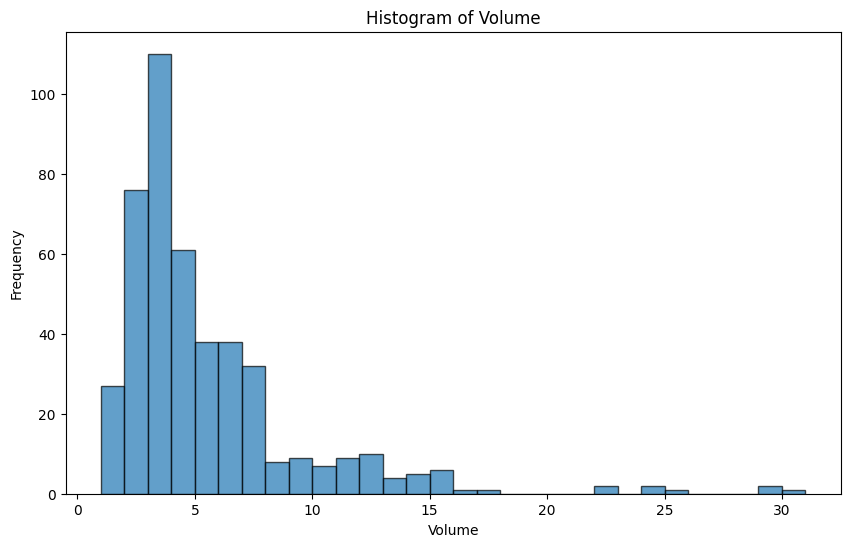

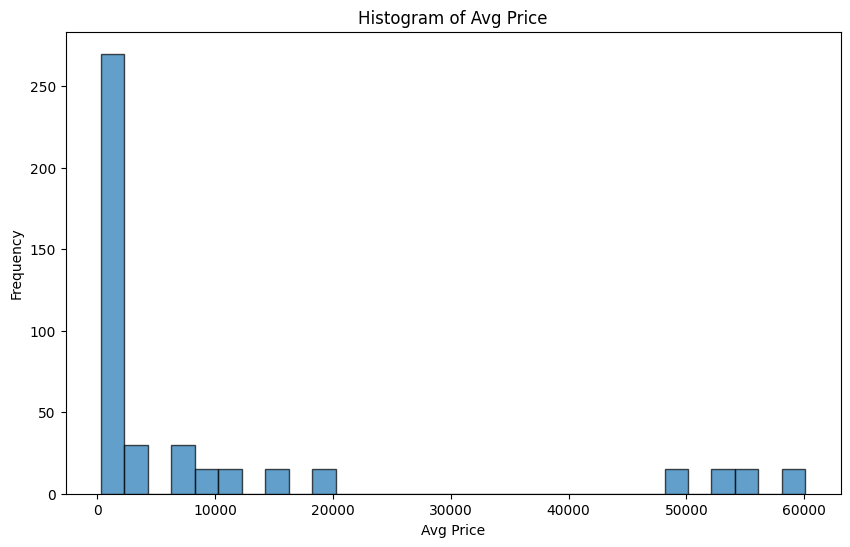

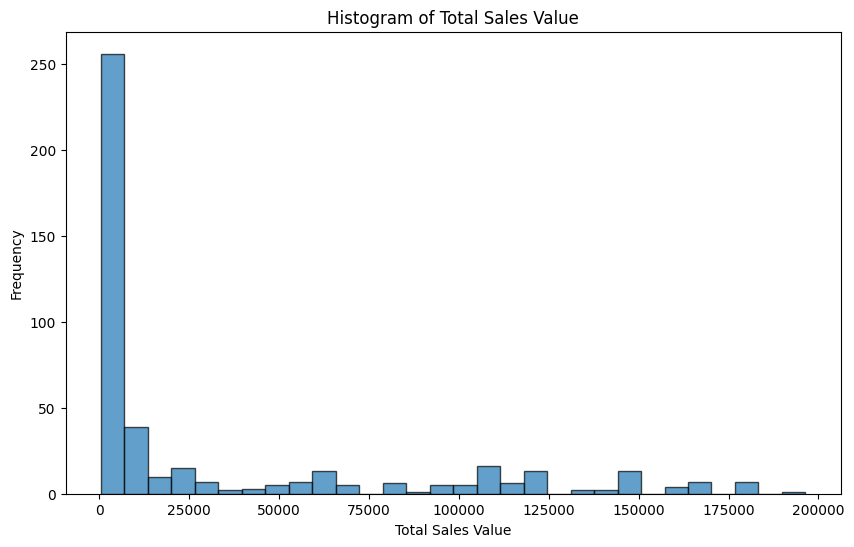

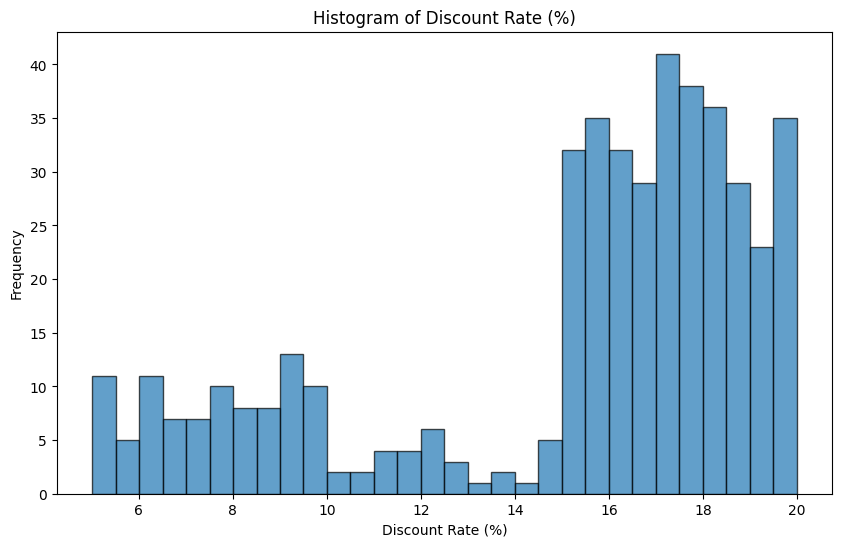

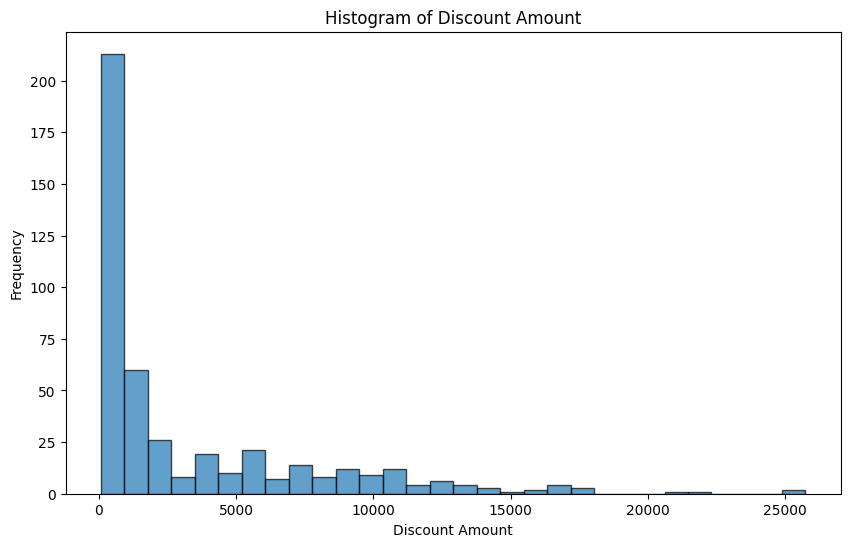

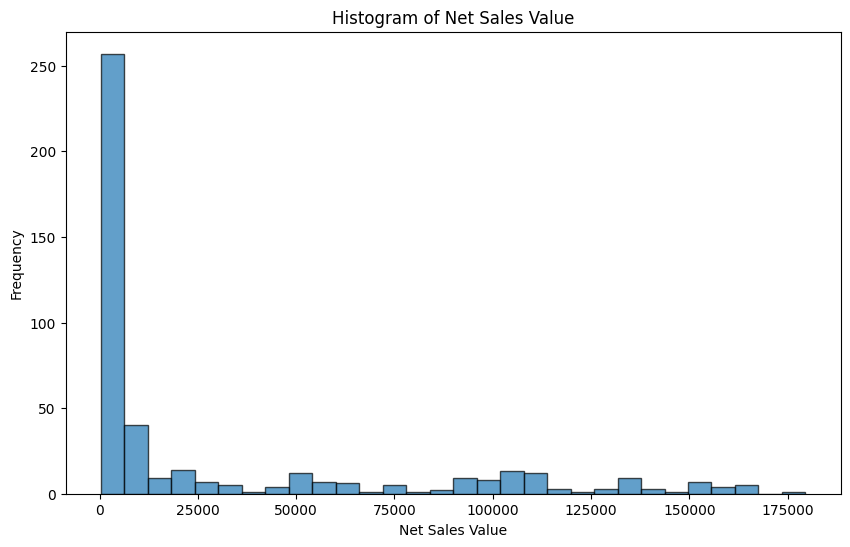

In [12]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Boxplots

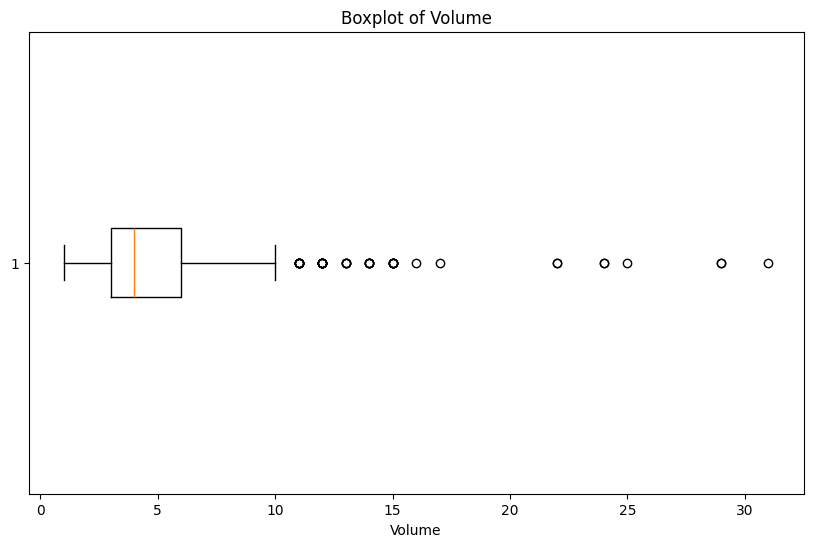

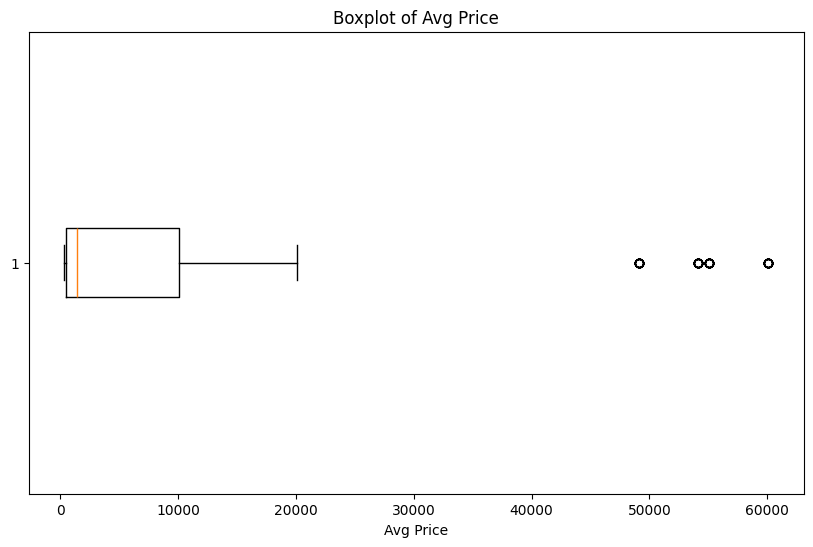

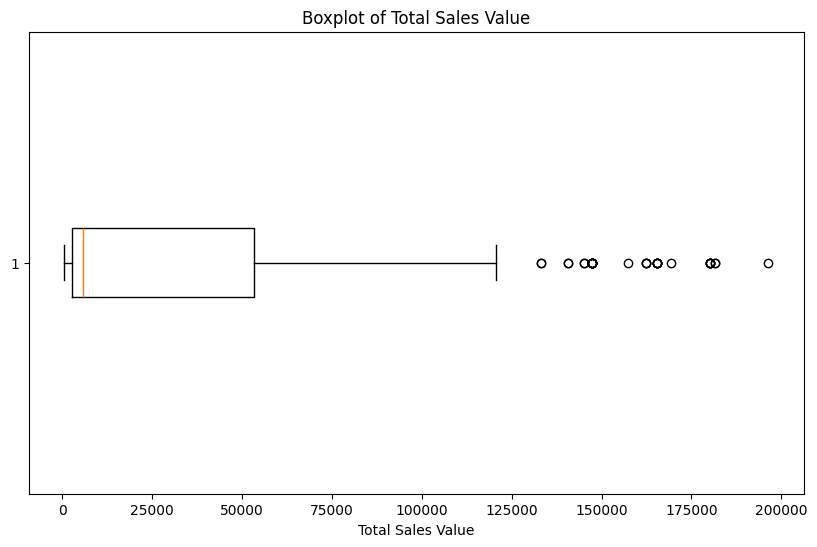

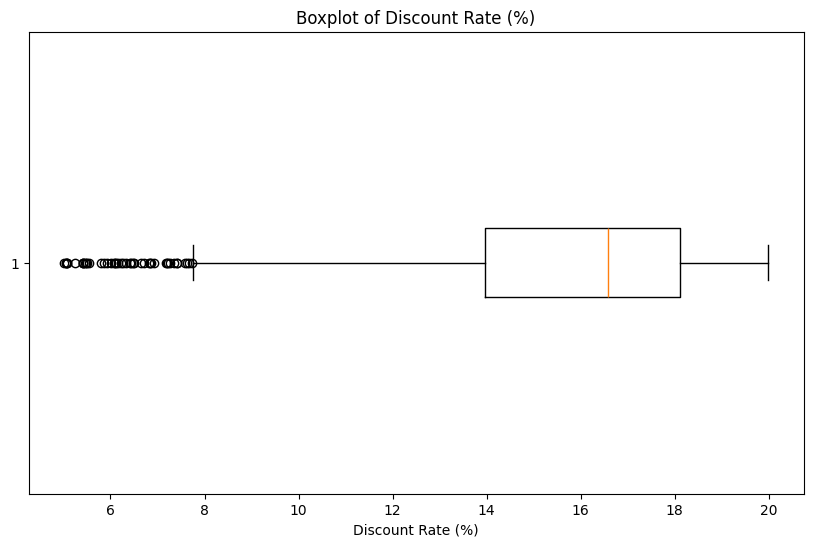

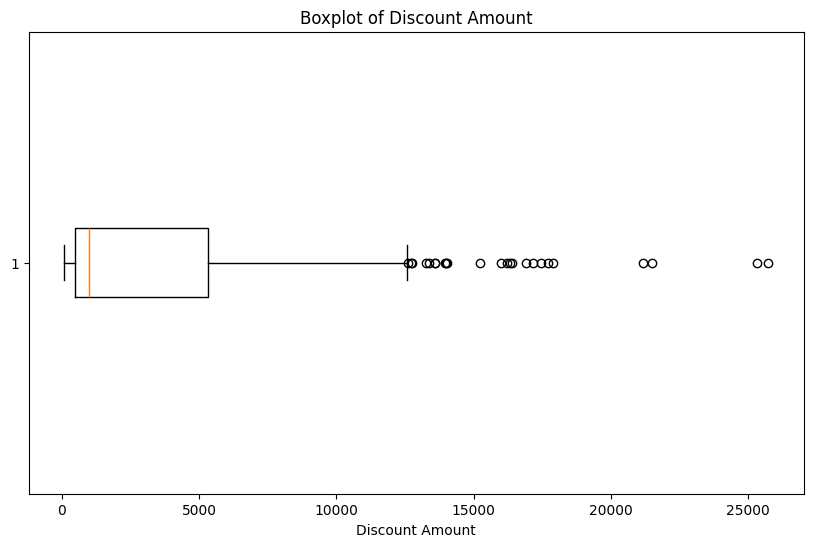

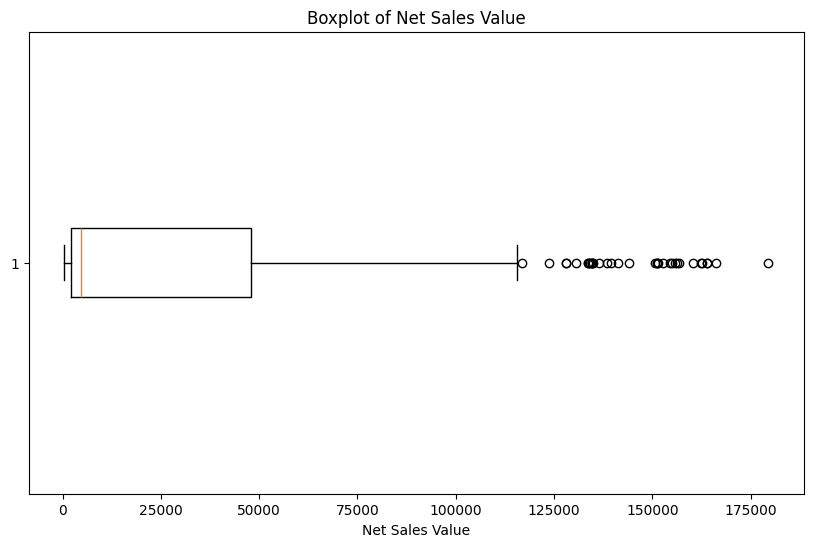

In [13]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


# Bar Chart Analysis for Categorical Column:

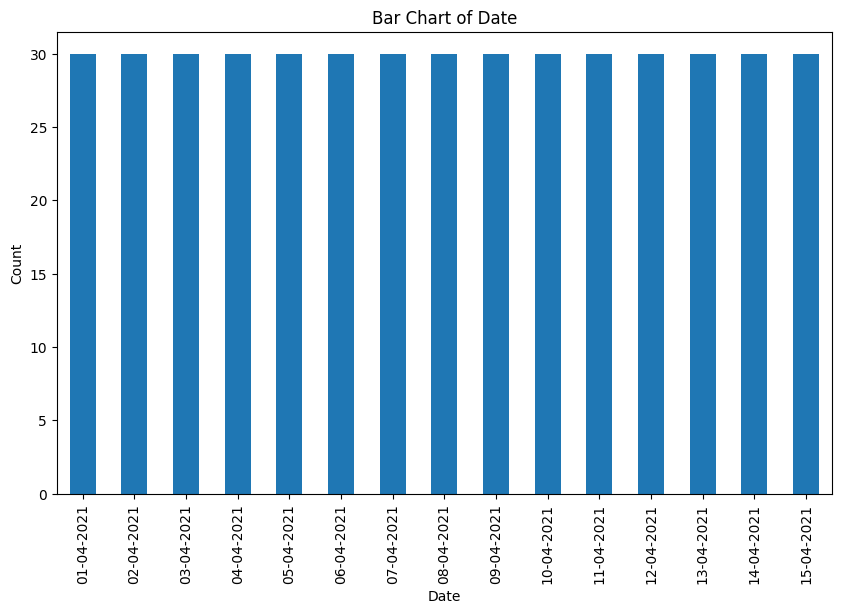

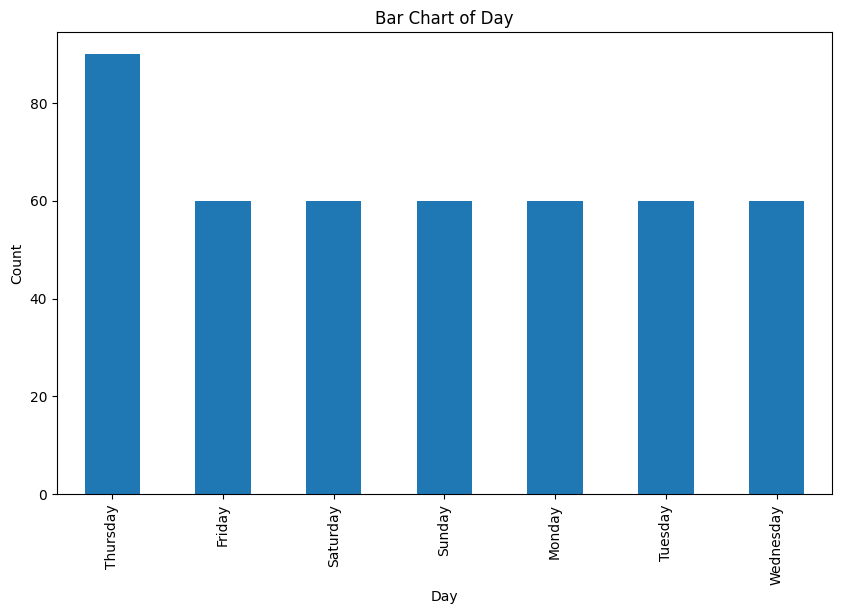

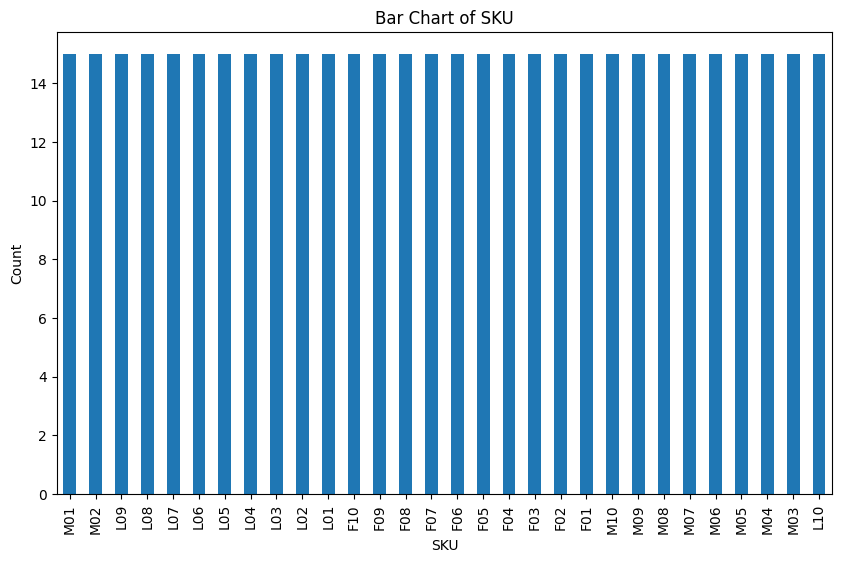

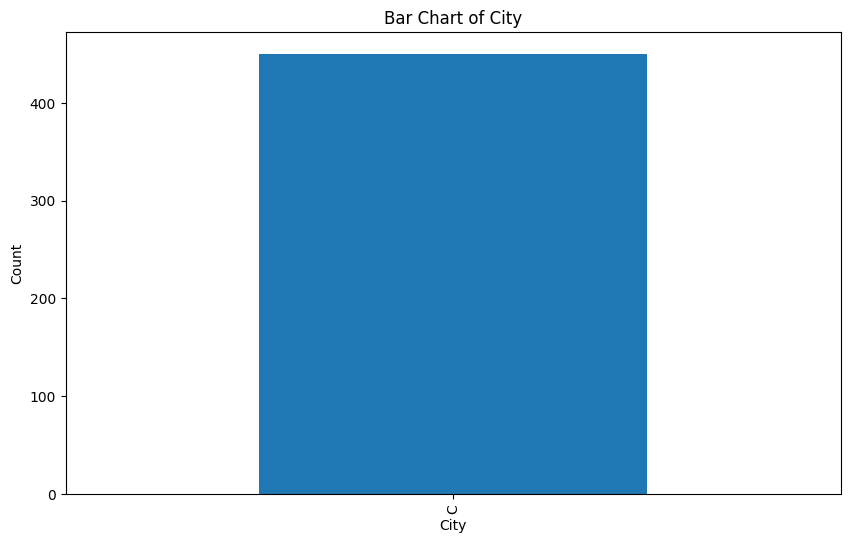

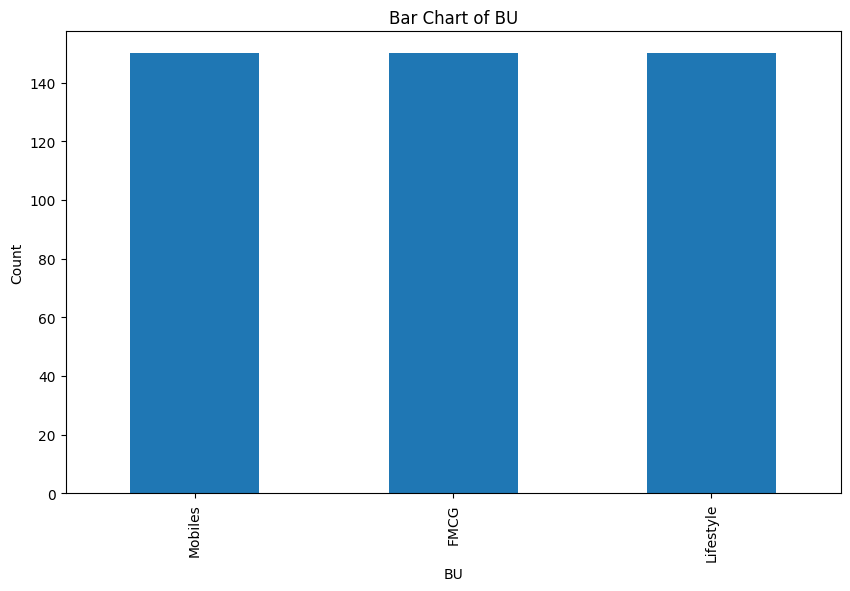

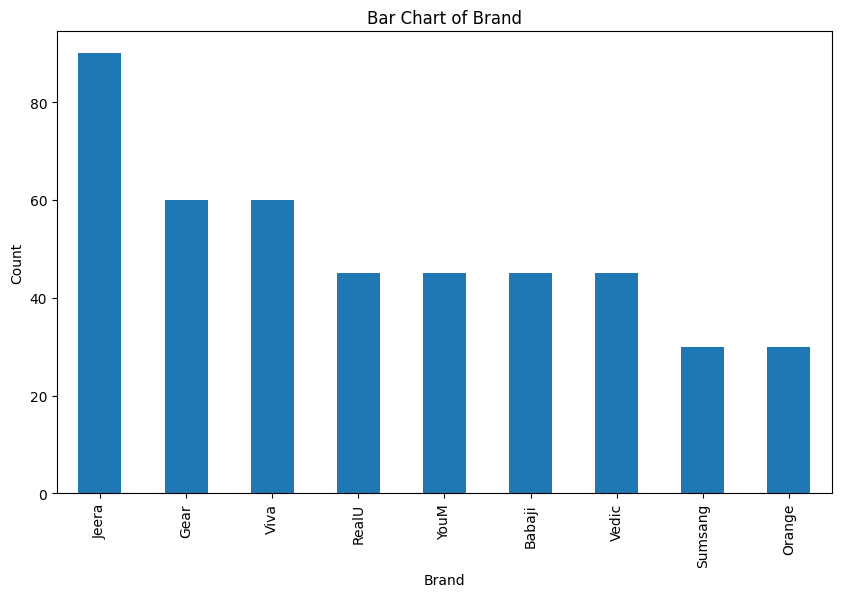

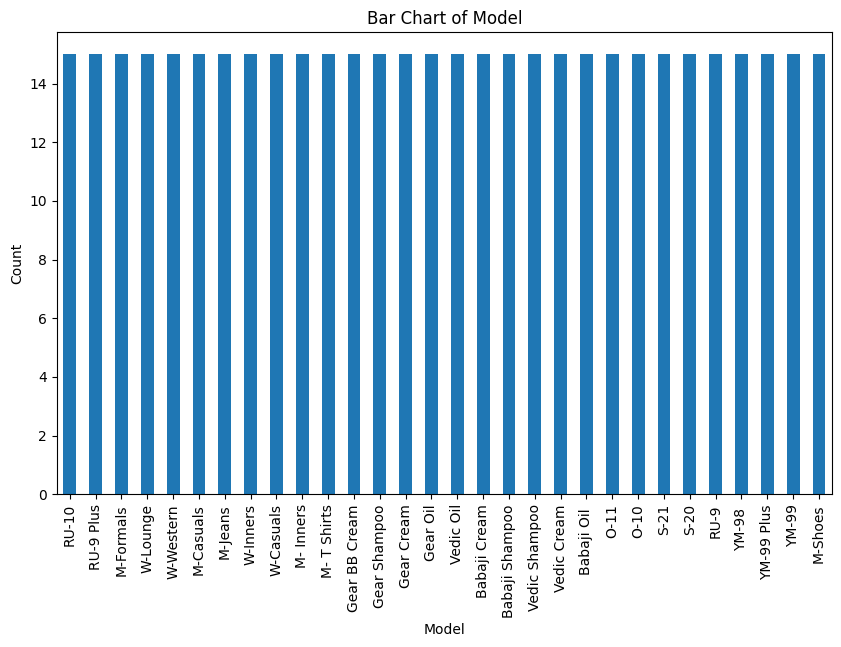

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


# Standardization of Numerical Variables

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Before and after comparison
print("Before Standardization:\n", df[numerical_columns].head())
print("After Standardization:\n", df_standardized[numerical_columns].head())


Before Standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
After Standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146    

# Conversion of Categorical Data into Dummy Variables

In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display a portion of the transformed dataset
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...